In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

#### Feature Selection
scikit-learn has several functions to help with feature selection in the package sklearn.feature_selection

- sklearn.feature_selection.VarianceThreshold
- sklearn.feature_selection.chi2
- sklearn.feature_selection.SequentialFeatureSelector

Computation: C = $\frac{1}{n-1}XX^T$

compute the covariance matrix: `np.cov()`

The data is in the columns of `X`, while we are using rows. So we need `np.cov(X.T)`. It also normalizes the data.

In [7]:
X = np.random.rand(3,4)
np.cov(X)

# subtract off the mean
ones = np.ones((1,3))     #1 rows and 3 columns
mean = np.mean(X, axis=1) #get by column

m = ones * mean

X = X - m.T
C = 1/3*np.dot(X, X.T)

##### Eigen values and vectors
`evals, evecs = np.linalg.eig(C)`

In [9]:
evals, evecs = np.linalg.eig(C)

Let's check that the matrix of Eigen vectors is orthonormal, and they do diagonalize C as promised.

In [11]:
product = np.dot(evecs, evecs.T)
product

array([[ 1.00000000e+00,  3.01447744e-17,  3.79459978e-18],
       [ 3.01447744e-17,  1.00000000e+00, -6.37574073e-17],
       [ 3.79459978e-18, -6.37574073e-17,  1.00000000e+00]])

In [12]:
diagonal = np.diag(evals)
diagonal

array([[0.00142913, 0.        , 0.        ],
       [0.        , 0.06327695, 0.        ],
       [0.        , 0.        , 0.1711095 ]])

In [13]:
transpose = evecs.T
product_transpose_diagonal = np.dot(diagonal, transpose)

product = np.dot(evecs, product_transpose_diagonal) - C

###### Principal Components Analysis

We need to make sure that the Eigen values are in descending order.

Then we can transform the data into the new bias by multiplying the matrix of Eigen vectors and the original data matrix.

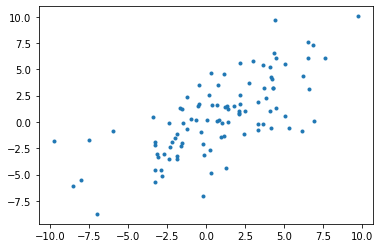

In [37]:
# 100 Gaussian random numbers with variances (5, 2)
variances = (5,2)
size = (100,2)
data = np.random.normal(scale=variances, size=size)


radian = -np.pi/4
a_11 = np.cos(radian)
a_12 = -np.sin(radian)
a_21 = np.sin(radian)
a_22 = np.cos(radian)

row_1 = [a_11, a_12]
row_2 = [a_21, a_22]
R = np.array([row_1, row_2])

# rotate
data = np.dot(data, R)

x = data[:,0]
y = data[:,1]
pl.plot(x, y, '.')

In [38]:
# PCA: Principle Components Analysis
def pca(data):
    C = np.cov(data.T)
    
    #Eigen values and Eigen vectors
    evals, evecs = np.linalg.eig(C)
    
    #sort them into descending order
    indices = np.argsort(evals)
    indices = indices[::-1]
    
    evecs = evecs[:,indices]
    evals = evals[indices]
    
    #transform the data
    product_transpose = np.dot(evecs.T, data.T).T
    
    return product_transpose, evals, evecs

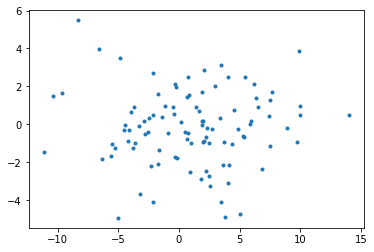

In [39]:
x_arr, evals, evecs = pca(data)

x = x_arr[:,0]
y = x_arr[:,1]
pl.plot(x, y, '.')

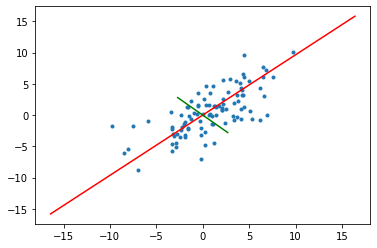

In [40]:
x = data[:,0]
y = data[:,1]
pl.plot(x, y, '.')

eigen_val_1 = evals[0]
eigen_val_2 = evals[1]

eigen_vector_11 = evecs[0,0]
eigen_vector_12 = evecs[0,1]
eigen_vector_21 = evecs[1,0]
eigen_vector_22 = evecs[1,1]

x1 = -eigen_val_1 * eigen_vector_11
x2 = eigen_val_1  * eigen_vector_11
y1 = -eigen_val_1 * eigen_vector_21
y2 = eigen_val_1 * eigen_vector_21

x = [x1, x2]
y = [y1, y2]
pl.plot(x, y, 'r-')

x1 = -eigen_val_2 * eigen_vector_12
x2 = eigen_val_2 * eigen_vector_12
y1 = -eigen_val_2 * eigen_vector_22
y2 = eigen_val_2 * eigen_vector_22
x = [x1, x2]
y = [y1, y2]
pl.plot(x, y, 'g-')

##### Dimensionality reduction
Eigen values telling us the amount of variance that each feature dimension 'explains', we can ignore those that don't do much. Since we've sorted them into order, that's the lower ones. But how many should you use?

In [41]:
# approximately equal to the variance (s.d squared)
evals

array([22.78847074,  3.88355902])

So we can take the cumulative sum and divide by the total:

In [45]:
cum_sum = np.cumsum(evals)

last_val = cum_sum[-1]

cum_sum /= last_val

So here the 1st dimension explains most of the variability, let's just use that.

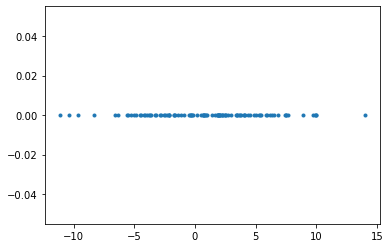

In [47]:
x, evals, evecs = pca(data)

x = x[:,0]

rows = 100
cols = 1
arr_like = (100,1)
y = np.zeros(arr_like)
pl.plot(x, y, '.')

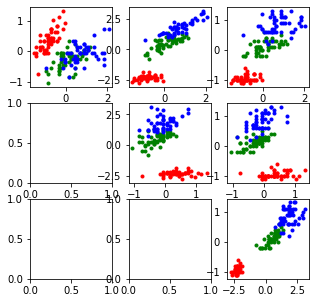

In [55]:
from sklearn.datasets import load_iris

x, y = load_iris(return_X_y=True)

x_bar = np.mean(x, axis=0)
x = x - x_bar

colors = ['r','g','b']
rows = 3
cols = 3
figure, axis = pl.subplots(rows, cols, figsize=(5,5))

dimen_1_range = 4
for row in range(rows):
    indices = np.where(y==row)
    for dimen_1 in range(dimen_1_range):
        for dimen_2 in range(dimen_1+1, dimen_1_range): 
            x_axis_loc = dimen_1
            y_axis_loc = dimen_2-1
            x_val = x[indices, dimen_1]
            y_val = x[indices, dimen_2]
            axis[x_axis_loc, y_axis_loc].plot(x_val, y_val, '.', color=colors[row])
    

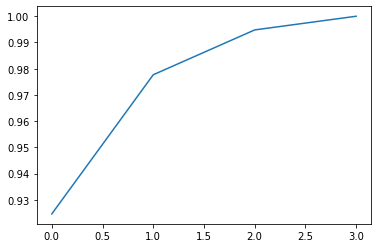

In [56]:
# Principle components analysis
x_new, evals, evecs = pca(x)

cum_sum = np.cumsum(evals)
total = cum_sum[-1]

mean = cum_sum / total
pl.plot(mean)

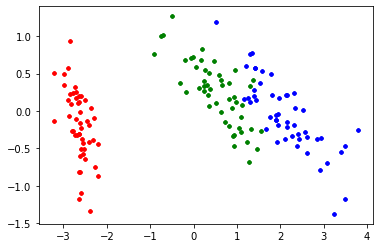

In [58]:
for row in range(rows):
    indices = np.where(y==row)
    for dimen_1 in range(dimen_1_range):
        x_vals = x_new[indices, 0]
        y_vals = x_new[indices, 1]
        pl.plot(x_vals, y_vals, '.', color=colors[row])